# Statistical Data Types

## Numerical or Quantitative 

### Discrete (counting)
like number of students in a class or number of experiments.
### Continuous (measuring) 
like height of the students in a class or temperature of water. 

## Categorical or Qualitative 

### Ordinal (ordered or ranked values) 
like hot-mild-cold or always-often-sometimes-rarely. 
### Nominal (not ordered) 
like blue-red-green

# Summary Statistics

Summary statistics describe data with the following main measures: 

- a measure of **location**, where the values are mostly located. This measure includes: mean, median, mode. 
- a measure of **spread**. This measure includes: standard deviation, variance, range, interquartile range. We will review the first two measures.
- a measure of the **shape** of the data distribution. This measure includes skewness or kurtosis.
- for more than one variable, a measure of **correlation**, statistical dependence of two variables. This measure is called a correlation coefficient.

## Location 

#### Mean

Average. It is simply the sum of all values divided by the total number of values.

If we have the following dataset:  `20  21  16  13  22  15`,
the mean value is calculated as follows:

$\bar{X}$ = (20 + 21 + 16 + 13 + 22 + 15) / 6 = 17.83

#### Median

The middle value in a sorted list of values. Median splits the data in the "middle" so that 50% of the data points are above this point and 50% below.

Let's use the same simple dataset above. To get the median, first, sort the list of values: 

`13 15 16 20 21 22`

In the "middle" of this dataset there are two values, `16` and `20`. If there is an even number of values in the middle of the sorted list, we need to calculate an average of these values. Hence, the median value for this dataset is: 

`(16 + 20) / 2 = 18`

The median is often not as affected by **outliers** within a dataset as the mean. 


In [2]:
import numpy as np
import pandas as pd

In [3]:
iris = pd.read_csv('iris.data', sep=',', 
                   header=None,  # the data file does not contain a header
                   names=['sepal length','sepal width','petal length','petal width','class'] # names of columns
                  )

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's group the data by the class of the flower and calculate the measures of location for each class and for each variable, such as sepal length and width, and petal length and width.

In [4]:
# grouping data by class
iris_grouped = iris.groupby('class')

# calculating mean (average) for each class:
iris_grouped.mean()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [5]:
# calculating median for each class:
iris_grouped.median()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


We can see that in this example, the mean and the median values for all of the iris classes are very close to each other. This means that the data is evenly divided and distributed around the mean.

## Spread

In this section, we will practice calculating **variance** and **standard deviation**, which are **measures of spread**, using the simple dataset of integers we used above:

`20  21  16  13  22  15`

Definitions of the main measures of spread are:

- **Variance** is a measure of the variability in the data, it measures how far values are spread out from the mean. Variance is roughly the average squared distance from the mean.

- **Standard deviation** is the square root of the variance and can be used to describe how close the typical data point is to the mean. Standard deviation is a descriptor of variability in the data. Usually 70% of the data will be within one standard deviation of the mean and about 95% will be within two standard deviations, if the data is normally distributed. The distance of any value from its mean is called **deviation**.

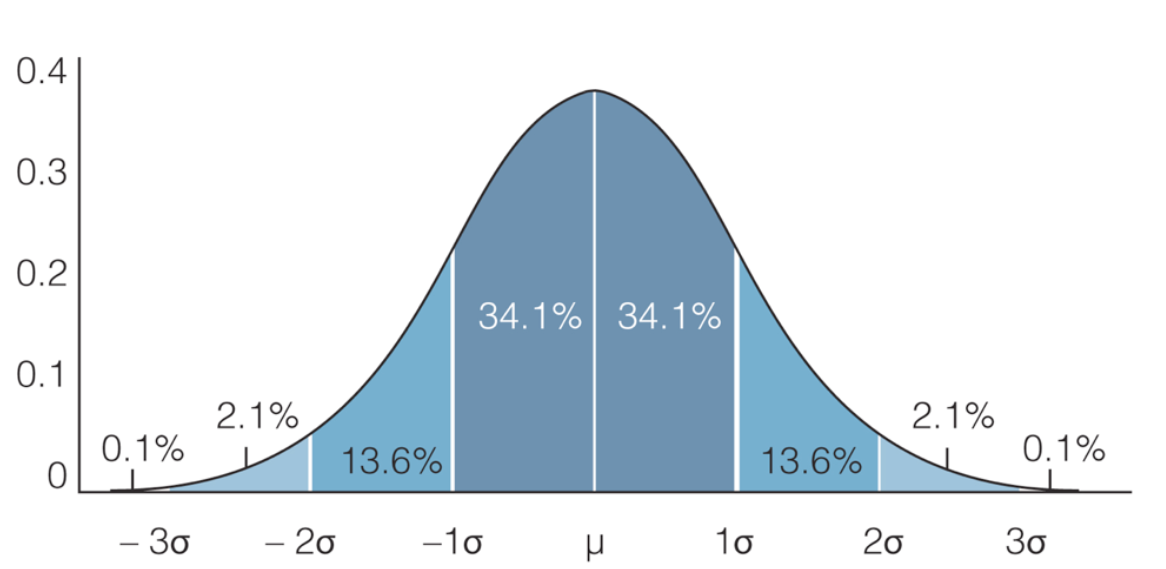

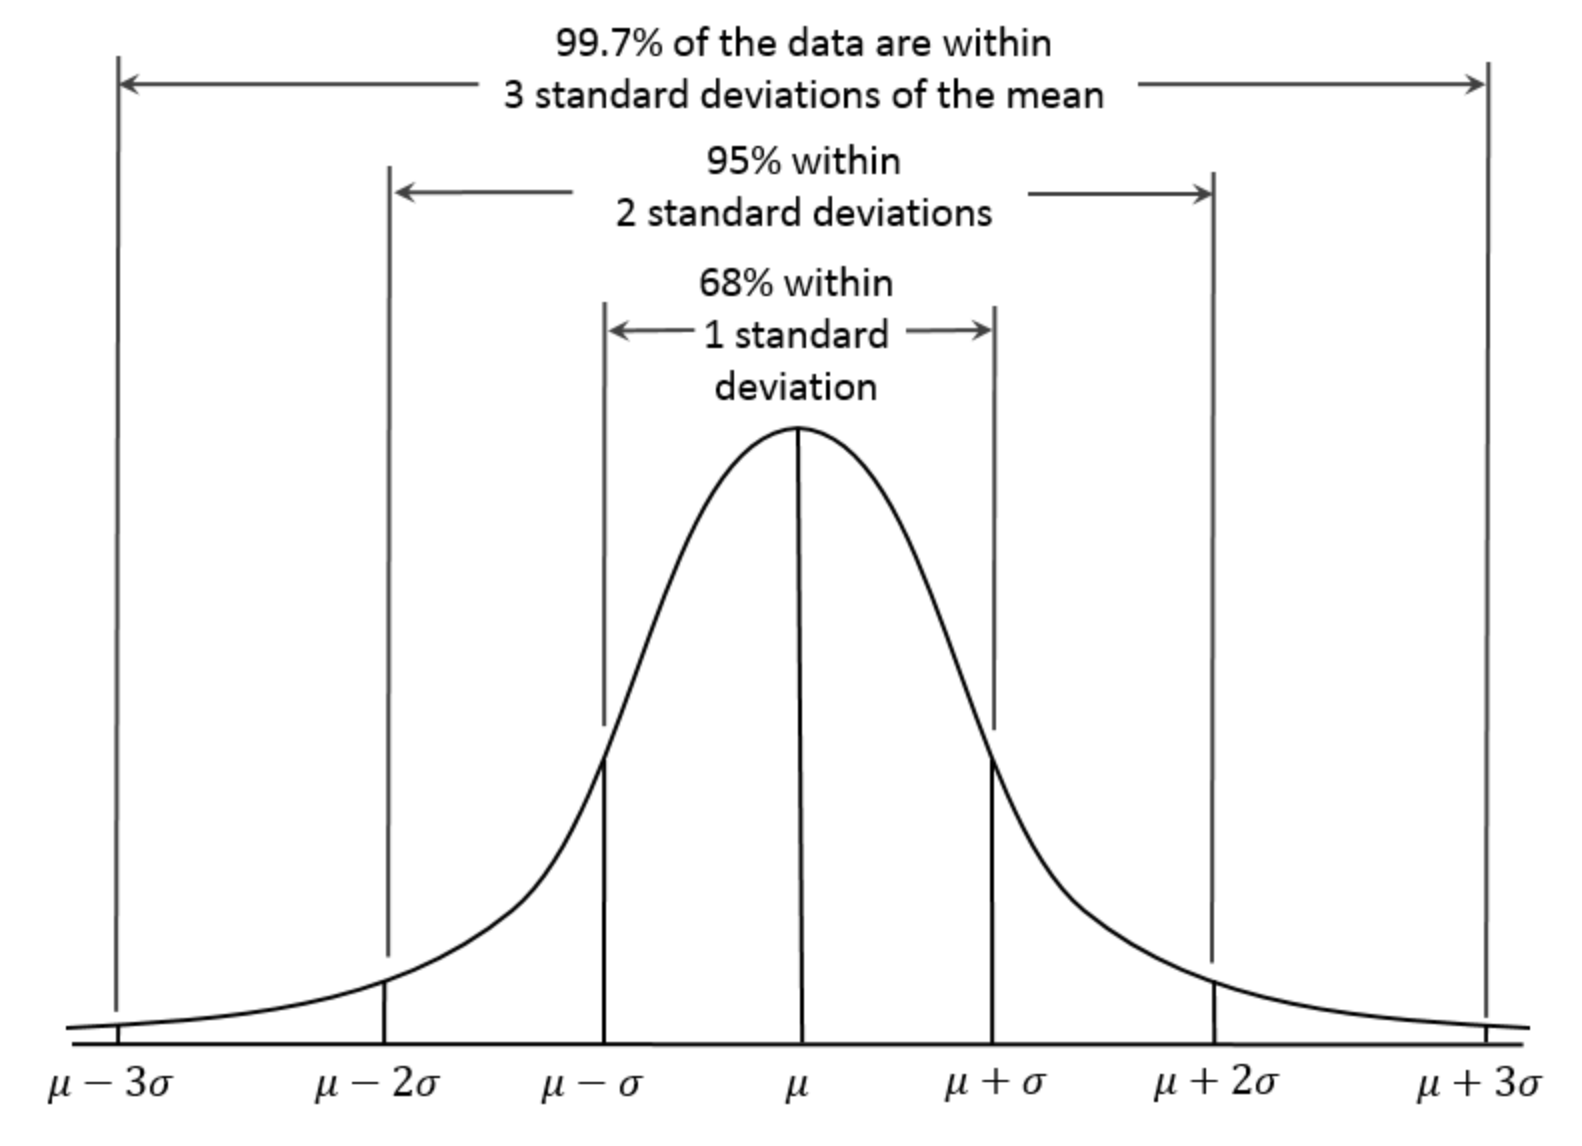

The graphic above summarizes measures of **the normal distribution**. This histogram demonstrates `the empirical rule`, also known as the 68–95–99.7 rule. 99.7% of the data is within 3 standard deviations of the mean; 95% of the data is within two standard deviations from the mean, and the values less than one standard deviation away from the mean account for 68.27% of the dataset.






Here is how we would calculate deviations for each element of the data sequence (you remember that we calculated $\bar{x}$ as 17.83 above):

$\begin{align*}
x_1 - \bar{x} &= 20 - 17.83 = 2.17 \\
x_2 - \bar{x} &= 21 - 17.83 = 3.17 \\
x_3 - \bar{x} &= 16 - 17.83 = -1.83 \\
x_4 - \bar{x} &= 13 - 17.83 = -4.83 \\
x_5 - \bar{x} &= 22 - 17.83 = 4.17 \\
x_6 - \bar{x} &= 15 - 17.83 = -2.83,
\end{align*}$

where $ x_1 $ ... $ x_6 $ are data points of the sequence of integers we are investigating.


If we square these deviations and then take an average, the result will be the **variance** which is usually denoted by $s^2$:

The formula for variance is:

$s^2 = \dfrac{\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}   $

Squaring the deviations achieves two goals: (1) it makes large values much larger, and (2) it gets rid of any negative signs. Let's calculate the variance for our dataset:

$s^2 = \dfrac{2.17^2 + 3.17^2 + (-1.83)^2 + (-4.83)^2 + 4.17^2 + (-2.83)^2}{6-1} = 13.37$

The **standard deviation** is the square root of the variance:

$ s = \sqrt{s^2} = \sqrt{13.37} = 3.66$

The standard deviation is a good indicator of how close the data points are to the mean. In the formula for variance, we used `n-1` instead of `n`. This is called Bessel's correction, it corrects the bias in the estimation of the population variance.

Moving back to the iris dataset, let's calculate the variance and standard deviation for each class of flower.

In [6]:
iris_grouped.var()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [7]:
iris_grouped.std()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


## Data Distrubitions

In [8]:
houses = pd.DataFrame({
    'price, thousands': [200,300,400,500,600,700,800,900,1000],
    'num of houses':[2,10,15,25,30,25,15,10,2]
})
houses

,"price, thousands",num of houses
0,200,2
1,300,10
2,400,15
3,500,25
4,600,30
5,700,25
6,800,15
7,900,10
8,1000,2


In [9]:
houses['num of houses'].mean()

14.88888888888889

In [10]:
houses['num of houses'].median()

15.0

In [11]:
houses['num of houses'].var()

101.61111111111111

In [12]:
houses['num of houses'].std()

10.080233683358294

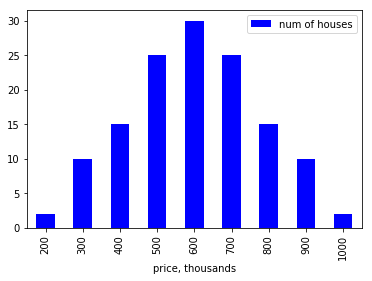

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
houses.plot(x = 'price, thousands', y = 'num of houses', kind="bar", color="blue")

You can see from the plot that the distribution appears to be symmetric and bell-shaped. This is an example of what we call a normal distribution. Half of the data will fall to the left of the mean; half will fall to the right. Mean and median values for normally distributed data should be roughly the same.

If the mean and median were different from one another, the shape of the curve would shift to have a left or right skew.

If the standard deviation were larger, the curve would be wider, and if the standard deviation were smaller, the curve would be narrower.

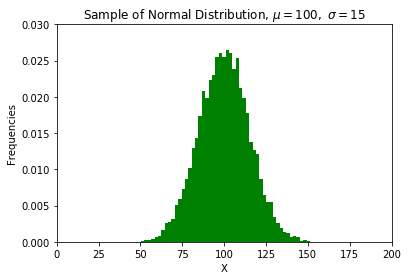

In [15]:
mu = 100       # mean of distribution
sigma = 15     # standard deviation of distribution

# Creating an array of 10,000 random numbers with 0 mean and St Dev of 1: The normal distribution with mean 0 and standard deviation 1 is called the standard normal distribution.
# x is a random variable with mean value of 'mu' and St Dev of 'sigma'
x = mu + sigma * np.random.randn(10000)

num_bins = 50   # number of bins to create
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=1)
plt.xlabel('X')
plt.axis([0, 200, 0, 0.03])
plt.ylabel('Frequencies')
plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=15$")
plt.show()

In [20]:
x.mean() #Every time you re-run the code above, the shape of the distribution will change slightly because on each execution the random number generator will create a new array of random numbers.

100.01372127458069

In [19]:
x.std() #Every time you re-run the code above, the shape of the distribution will change slightly because on each execution the random number generator will create a new array of random numbers.

15.03919972064365

**A low standard deviation indicates that there is little variability in the data and the data points are tightly clustered around the mean of the distribution, while a high value of standard deviation indicates that the values are spread out over a wider range of values.**

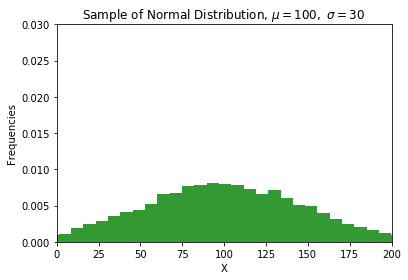

In [21]:
mu = 100 
sigma = 50     # changed standard deviation from 15 to 50

x = mu + sigma * np.random.randn(10000)

num_bins = 50   # number of bins to create
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.8)
plt.xlabel('X')
plt.axis([0, 200, 0, 0.03])
plt.ylabel('Frequencies')
plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=30$")
plt.show()

### Shape

There are two measures that describe the shape of a distribution:

1. **Skewness** is a measure of the asymmetry of a distribution. When a distribution trails off to the right, appearing as a tail on the right-hand side of the graph, the shape is said to be **right skewed**, or has a *positive skew*. Similarly, when a distribution trails off to the left, we say that the data is **left skewed**, or has a *negative skew*.

The normal distribution has a skewness of 0. Therefore, the skewness will tell us whether data is concentrated to the left or to the right of the mean ([Wikipedia, 2018](https://upload.wikimedia.org/wikipedia/commons/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg)).

![Positive and Negative Skewness](https://upload.wikimedia.org/wikipedia/commons/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg "Skewness")

The Skewness coefficient can be calculated using the formula below which is called Pearson's second skewness coefficient (median skewness).

`Skewness = 3 * (Mean - Median) / standard deviation`


In [22]:
iris_grouped.skew()

,petal length,petal width,sepal length,sepal width
class,,,,
Iris-setosa,0.071846,1.197243,0.120087,0.107053
Iris-versicolor,-0.606508,-0.031180,0.105378,-0.362845
Iris-virginica,0.549445,-0.129477,0.118015,0.365949


As you can see from the table above, data for the Iris-setosa class of iris flower is right skewed (positive skew) for all four parameters, the data for Iris-versicolor is mostly left skewed (negative skew), and the data for Iris-virginica is mostly right skewed with petal width data being left skewed.

2. **Kurtosis** is a measure of the "tailedness" of the distribution &mdash; it is a good indicator of `the outliers` in the data. 

The normal distribution has a kurtosis of 3. If the distribution has kurtosis less than 3, there are fewer outliers than the normal distribution and vice versa, kurtosis of greater than 3 indicates there are more outliers.


### Correlation

Correlation, which always takes values between -1 and 1, describes the strength of the linear relationship between two variables. The correlation coefficient is usually denoted by **`R`**.

Two or more variables can vary with each other. This is called **covariance**. Covariance is a measure of the joint variability of two variables. 

The sign of covariance shows the tendency in the linear relationship between the variables.
- **Positive correlation**: as one variable increases, the other variable also increases. (Low values for variable x associated with low values for variable y; high values for variable x associated with high values for variable y.)
- **Negative correlation**: as one variable increases, the other variable decreases. (Low values for variable x associated with high values for variable y; high values for variable x associated with low values for variable y) 

However, the magnitude of the covariance is not easily interpretable. **Correlation coefficient** is used as a measure of covariance. 

As seen in the set of images below:
- If the linear relationship is strong and negative, the correlation coefficient R will be near -1, but never less than -1.
- If there is no apparent linear relationship, the correlation coefficient R will be near 0.
- If the linear relationship is strong and positive, the correlation coefficient R will be near +1, but never greater than +1.


![Correlation](https://spss-tutorials.com/img/correlation-coefficient-perfect-linear-relations.png "Correlation") 


The correlation coefficient indicates the strength of a linear relationship between two variables but it does not provide any insights into other characteristics of these relationships.

The image below shows a set of famous scatter plots known as Anscombe's quartet. The four `y` variables have the same mean (7.5), variance (4.12), correlation (0.816) and the same regression line `(y = 3 + 0.5x)`. However, the distribution of the variables is very different. 

![Anscombe's quartet](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/990px-Anscombe%27s_quartet_3.svg.png "Anscombe's quartet") ([Wikipedia, 2018)](https://en.wikipedia.org/wiki/Correlation_and_dependence))

Plot 1 (top left corner) shows data which appears scattered but demonstrates a consistent linear trend for the entire data set. Plot 2 (top right corner) shows the data plot that resembles an arc. Plot 3 (first in the second row) shows almost a perfect linear relationship for all data points, except one outlier, which sits far above the trendline of the rest of the data. Plot 4 shows all data points (except one) are centered on one value for `x`, and scattered across a range for `y`. The single data point that does not fit with this description has a much larger value for both `x` and `y` than all of the others. 

These four datasets were constructed in 1973 by statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

In `pandas`, the correlation coefficient is calculated using `corr()` function. However, keep in mind that this function won't work on a grouped object. For example, we can calculate the correlation between sepal length and petal length in the iris data, across all classes of the flower.

In [23]:
iris['sepal length'].corr(iris['petal length'])

0.8717541573048718

There is a quite strong correlation between sepal and petal length across all three classes of flowers.

If we want to be able to calculate correlations within the groups, we can use a couple of approaches.

**Approach 1**: Use the `corrwith()` function which allows us to calculate pairwise correlation between the columns of two DataFrame objects:

In [24]:
correlations = (iris[['sepal length', 'class']]
                .groupby('class')
                .corrwith(iris['petal length'])
                .rename(columns={'sepal length' : 'Corr Coef'}))

correlations

,Corr Coef
class,
Iris-setosa,0.263874
Iris-versicolor,0.754049
Iris-virginica,0.864225


**Approach 2**: Use `apply()` and `lambda` on the groupBy object:

In [25]:
iris_grouped.apply(lambda iris_grouped: iris_grouped['sepal length'].corr(iris_grouped['petal length']))

class
Iris-setosa        0.263874
Iris-versicolor    0.754049
Iris-virginica     0.864225
dtype: float64

The correlation between sepal and petal lengths is quite strong for versicolor (R = 0.75) and virginica (R = 0.86) flowers, but is weak for setosa flowers with R = 0.26.

#### Normalization 

In [26]:
# This will set data_url to the URL of the dataset so you can download it
data_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

# Download the data
red_wine_data = pd.read_csv(data_url, header=0, sep=";")
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
red_wine_data.isnull().values.any()

False

This data set contains attributes that are on different scales. To normalize the data so all attributes (columns) are on the same scale, we can scale each column so that the mean becomes zero and the data is in units of standard deviation. See the following article for different normalization methods https://en.wikipedia.org/wiki/Normalization_(statistics) (Wikipedia, 2018). 

We will use Standard Score, which is calculated as follows: 

${\dfrac {X-m}{s}}$, 

where $ m $ is the mean and $ s $ is standard deviation.

In [29]:
normalized_red_wine_data = (red_wine_data - red_wine_data.mean()) / red_wine_data.std()
normalized_red_wine_data[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


Now we can calculate correlations for all attributes within the DataFrame:

In [30]:
normalized_red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
